In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 0: EDA and preprocessing

In [2]:
retention_df = pd.read_csv("retentiondata_case.csv")

print("\nMissing values per column:")
print(retention_df.isna().sum())

print("Shape:", retention_df.shape)
print("Columns:", list(retention_df.columns))
retention_df.head()


Missing values per column:
acct_ref                    0
cust_ref                    0
has_dependents              0
tenure_mo                   0
home_phone                  0
multi_line                  0
internet_plan               0
add_on_security             0
add_on_backup               0
add_on_protection           0
tech_support_std            0
stream_tv                   0
stream_movies               0
contract_term               0
e_bill_opt_in               0
pay_method                  0
monthly_fee                 0
total_billed                8
left_flag                   0
fiscal_qtr                  0
gender                      0
age_years                   0
is_married                  0
dependents_count            0
referred_friend             0
referrals_count             0
recent_offer             3106
avg_long_dist_fee           0
internet_tech            1212
avg_gb_download             0
premium_support             0
stream_music                0
unlimited_da

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.0,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,NaN,17.09,DSL,16,No,No,Yes,0.0,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,NaN,10.47,DSL,21,No,No,Yes,0.0,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,NaN,0.00,DSL,10,Yes,No,Yes,0.0,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,NaN,9.12,Fiber Optic,51,No,No,Yes,0.0,0,18.24


## Preprocessing

In [3]:
retention_df['recent_offer']=retention_df['recent_offer'].fillna("None")
retention_df['internet_tech']=retention_df['internet_tech'].fillna("No Internet")
retention_df['total_billed']=retention_df['total_billed'].fillna(0)

In [4]:
print("\nMissing values per column:")
print(retention_df.isna().sum())


Missing values per column:
acct_ref                 0
cust_ref                 0
has_dependents           0
tenure_mo                0
home_phone               0
multi_line               0
internet_plan            0
add_on_security          0
add_on_backup            0
add_on_protection        0
tech_support_std         0
stream_tv                0
stream_movies            0
contract_term            0
e_bill_opt_in            0
pay_method               0
monthly_fee              0
total_billed             0
left_flag                0
fiscal_qtr               0
gender                   0
age_years                0
is_married               0
dependents_count         0
referred_friend          0
referrals_count          0
recent_offer             0
avg_long_dist_fee        0
internet_tech            0
avg_gb_download          0
premium_support          0
stream_music             0
unlimited_data_opt       0
refunds_total            0
extra_data_fees_total    0
long_dist_fees_total     0


## Feature Engineering: 

1. Adding a column for >3 referrals

In [5]:
retention_df['>_3_Referrals'] = np.where(retention_df['referrals_count'] >= 3, "Yes", "No")

2. Adding a column for married with dependents flag

In [6]:
retention_df["married_with_dependents"] = np.where( (retention_df["is_married"] == "Yes") & (retention_df["dependents_count"] > 0), "Yes", "No" )

Creating number of services column

In [7]:
services = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line'
]

retention_df['number_of_services'] = (
    retention_df[services]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

retention_df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,10,No,No,Yes,0.0,0,0.00,No,No,0
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,16,No,No,Yes,0.0,0,581.06,No,No,1
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,21,No,No,Yes,0.0,0,20.94,No,No,1
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,10,Yes,No,Yes,0.0,0,0.00,No,No,0
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,51,No,No,Yes,0.0,0,18.24,No,No,1


Creating number of add ons column

In [8]:
add_ons = [
    'add_on_backup',
    'add_on_security',
    'add_on_protection'
]

retention_df['number_of_addons'] = (
   retention_df[add_ons]
      .eq('Yes')        # True if value is 'Yes'
      .sum(axis=1)      # True counts as 1, False as 0
)

## Technical Support column

In [10]:
retention_df['support'] = np.select(
    [
        retention_df['premium_support'].eq('Yes'),
        retention_df['tech_support_std'].eq('Yes')
    ],
    [
        'Premium',
        'Standard'
    ],
    default='None'
)

retention_df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,No,Yes,0.0,0,0.00,No,No,0,1,None
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,No,Yes,0.0,0,581.06,No,No,1,2,None
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,No,Yes,0.0,0,20.94,No,No,1,2,None
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,Yes,0.0,0,0.00,No,No,0,2,Premium
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,No,Yes,0.0,0,18.24,No,No,1,0,None


Drop columns we are not using 

In [19]:
columns_to_drop = [
    'home_phone',
    'stream_movies',
    'stream_music',
    'stream_tv',
    'multi_line',
    'add_on_backup',
    'add_on_security',
    'add_on_protection',
    'premium_support',
    'tech_support_std',
    'acct_ref',
    'cust_ref',
    'gender',
    'fiscal_qtr',
    'internet_plan',
    'referrals_count',
    'referred_friend'
    
    
]

df = retention_df.drop(columns=columns_to_drop)

df.head()

,has_dependents,tenure_mo,contract_term,e_bill_opt_in,pay_method,monthly_fee,total_billed,left_flag,age_years,is_married,...,avg_gb_download,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,>_3_Referrals,married_with_dependents,number_of_services,number_of_addons,support
0,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,36,Yes,...,10,Yes,0.0,0,0.00,No,No,0,1,None
1,No,34,One year,No,Mailed check,56.95,1889.50,No,46,No,...,16,Yes,0.0,0,581.06,No,No,1,2,None
2,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,37,No,...,21,Yes,0.0,0,20.94,No,No,1,2,None
3,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,53,No,...,10,Yes,0.0,0,0.00,No,No,0,2,Premium
4,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,19,No,...,51,Yes,0.0,0,18.24,No,No,1,0,None


## Step 1: Partition our data

In [21]:
### For classification problems, first determine the classes of your response variable
print(df["left_flag"].dtype)                     # what type is it? 
print(df["left_flag"].unique())                  # list of unique classes in the response variable
 

object
['No' 'Yes']


In [22]:
Y = (df["left_flag"] == "Yes").astype("int64") # returns True for rows where response == 1 and False otherwise then .astype(int) converts True→1 and False→0, so the “positive” label becomes 1
X = df.drop(columns=["left_flag"]) 

In [23]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,     # 30% test, 70% train
    random_state=99,   # reproducibility
    shuffle=True       # shuffle before splitting
)

# Check shapes
X_train.shape, X_test.shape

((3945, 23), (1691, 23))

In [24]:
# Needed for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Identify column types from TRAIN ONLY
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

# Build preprocessing (train-only learning happens during .fit())
# numeric variable imputation
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

#categorical variable imputation
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="warn", sparse_output=False))  
])

#Aplpy the preprocessing to numeric and categorical variables
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#!pip install xgboost if not installed
from xgboost import XGBClassifier


# Stratified CV preserves class balance in each fold (important for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# Pipeline with XGBoost model
xgb_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        n_jobs=2,          # use all cores
        eval_metric="auc",  # pairs well with scoring="roc_auc"
        tree_method="hist", # fast CPU histogram algorithm (use "gpu_hist" if you have a GPU)
        random_state=99
    ))
])

#  Hyperparameter grid (more parameters here: https://federated-xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
param_grid = {
    "model__n_estimators": [200, 600],
    "model__max_depth":    [4, 6, 8],
    "model__learning_rate":[0.035, 0.1],
    "model__subsample":    [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3]
}

#  Cross-validated grid search (same scoring)
xgb_cv = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

# Fit 
xgb_cv.fit(X_train, Y_train)


print("Best params selected by CV:", xgb_cv.best_params_)
print("Best CV ROC-AUC:", round(xgb_cv.best_score_, 3))

Best params selected by CV: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.035, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best CV ROC-AUC: 0.896


cat__contract_term_Month-to-month    0.218713
cat__>_3_Referrals_No                0.097135
cat__contract_term_Two year          0.076614
cat__pay_method_Electronic check     0.073074
cat__has_dependents_No               0.052928
cat__married_with_dependents_No      0.047340
cat__contract_term_One year          0.039269
num__dependents_count                0.037315
num__tenure_mo                       0.030084
cat__support_None                    0.029687
dtype: float32

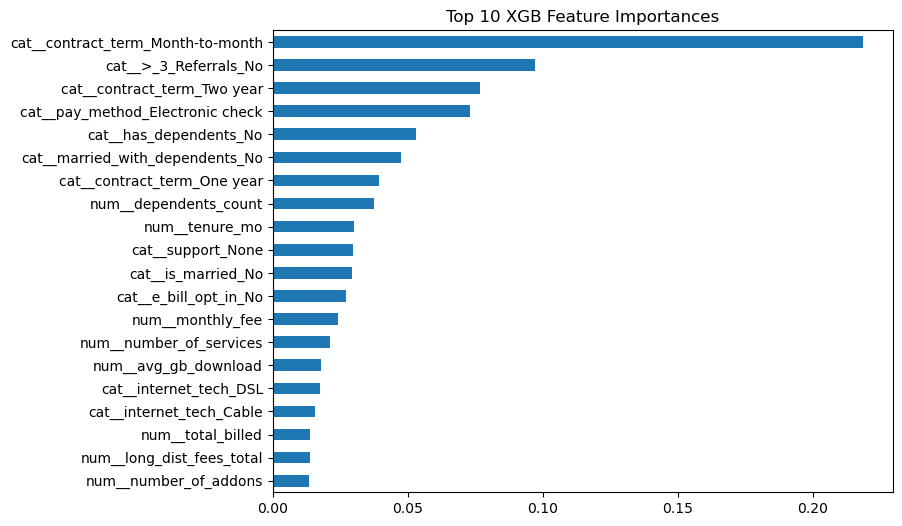

In [29]:
# Get best fitted model from GridSearchCV
best_xgb = xgb_cv.best_estimator_.named_steps["model"]

#get important features
pre = xgb_cv.best_estimator_.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()
imp = pd.Series(best_xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

display(imp.head(10))  # top 10 features


# Optional: plot top features
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
imp.head(20).plot(kind="barh", x="feature", y="importance", legend=False)
plt.title("Top 10 XGB Feature Importances")
plt.gca().invert_yaxis()
plt.show()

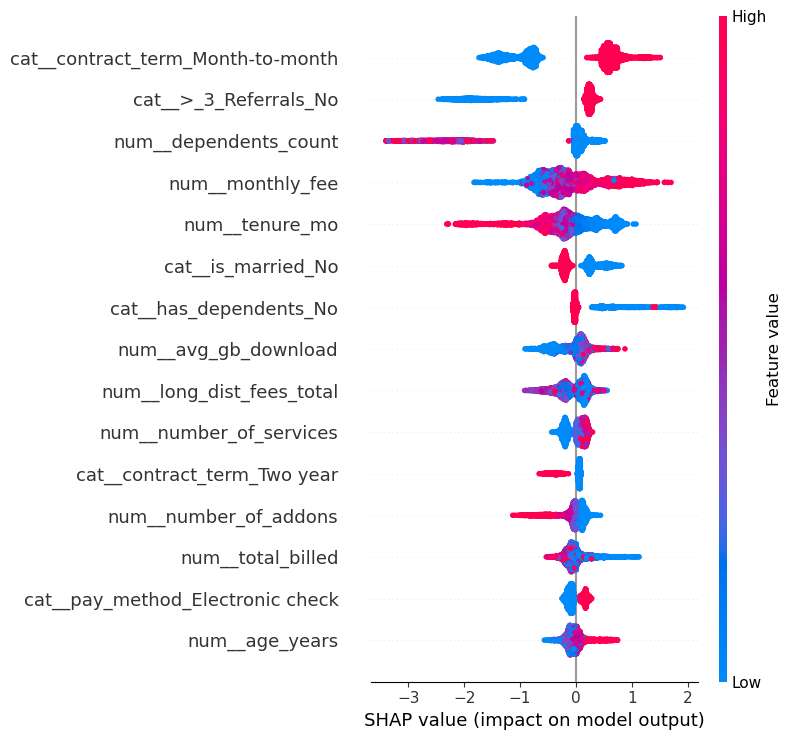

In [27]:
#!pip install shap   # Install SHAP library if not already installed
import shap                  

pre = xgb_cv.best_estimator_.named_steps["preprocess"]

#  Transform X the same way the model saw it
X_train_enc = pre.transform(X_train)

#  Get feature names after preprocessing (works for ColumnTransformer / Pipeline in sklearn >= 1.0)
feature_names = None
if hasattr(pre, "get_feature_names_out"):
    feature_names = pre.get_feature_names_out()
    
# Create SHAP explainer for tree-based models (e.g., XGBoost, LightGBM, RandomForest)
explainer   = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training set
# Each value shows how much a feature pushes a prediction toward class 1 (positive) or class 0 (negative)
shap_values = explainer.shap_values(X_train_enc)

# Overall PLot Beeswarm plot: this shows both which features matter most and the direction of their influence

shap.summary_plot(shap_values, X_train_enc, max_display=15, show=True,feature_names=feature_names)